# Preparations

In [1]:
# Fetch packages.
from basico import *
import json
import matplotlib.pyplot as plt
import statistics
import timeit
import numpy

In [2]:
# Function for plotting benchmarking output.
def plot_benchmark(benchmarks,lengs):
    medians = list(1000*numpy.array(list(map(statistics.median, benchmarks))))
    plt.plot(lengs,medians,linewidth=4)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([lengs[0],lengs[-1]])
    plt.ylim([0.001,1.2*numpy.max(medians)])    # Choice of ymin does skew how plot appears.

In [3]:
# Benchmarking functions.
def make_benchmark(n,leng,method):
    def benchmark_func():
        run_time_course(duration=leng, stepsize=10, method=method)
    return timeit.Timer(benchmark_func).repeat(repeat=n, number=1)

# Serialises a benchmarking output using JSON.
def serialize(benchmarks,lengs,filename):
    with open('../Benchmarking_results/Prototyping/%s.json'%(filename) , "w") as write:
        json.dump({"benchmarks": benchmarks, "medians": list(1000*numpy.array(list(map(statistics.median, benchmarks)))), "lengs": lengs.tolist()} , write)

# Benchmarks

### Multistate

In [5]:
# Load model.
multistate_ss_time = 20
load_model('../Data/multistate.xml');

CPU times: user 3.14 ms, sys: 0 ns, total: 3.14 ms
Wall time: 12.3 ms


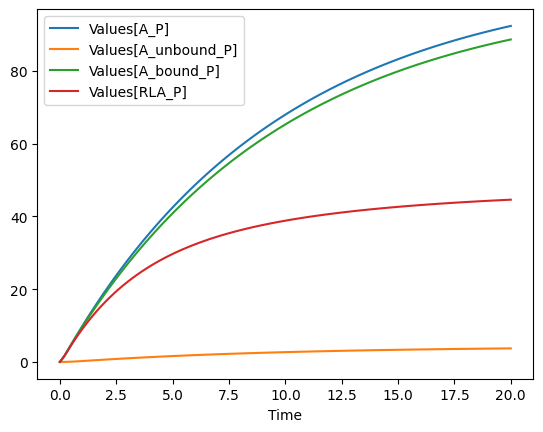

In [13]:
# Check ODE simulation output.
%time tc_multistate_ODE = run_time_course(duration = multistate_ss_time, method='deterministic')
tc_multistate_ODE.loc[:, ['Values[A_P]', 'Values[A_unbound_P]', 'Values[A_bound_P]', 'Values[RLA_P]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/multistate_ode.png')
plt.savefig('../Plots/Trajectories/COPASI/multistate_ode.pdf')

In [11]:
multistate_ss_time = 10000

CPU times: user 9.43 ms, sys: 1.13 ms, total: 10.6 ms
Wall time: 10.4 ms


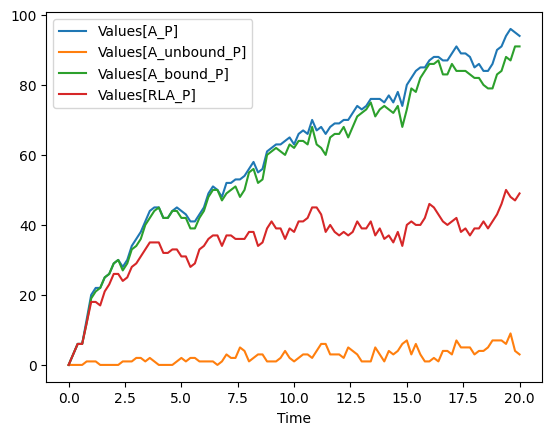

In [7]:
# Check Gillespie simulation output.
%time tc_multistate_Gillespie = run_time_course(duration = multistate_ss_time, method='directMethod')
tc_multistate_Gillespie.loc[:, ['Values[A_P]', 'Values[A_unbound_P]', 'Values[A_bound_P]', 'Values[RLA_P]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/multistate_ssa.png')
plt.savefig('../Plots/Trajectories/COPASI/multistate_ssa.pdf')

In [ ]:
# Load model (without observables).
load_model('../Data/multistate_no_obs.xml');

In [8]:
# Check ODE simulation time.
%time run_time_course(duration = multistate_ss_time, method='deterministic')
%time run_time_course(duration = multistate_ss_time, atuomatic=True, method='deterministic') # Supposedly setting "automatic=True" can improve/reduce performance in some cases.
1;

CPU times: user 3.08 ms, sys: 0 ns, total: 3.08 ms
Wall time: 3.1 ms
CPU times: user 2.28 ms, sys: 0 ns, total: 2.28 ms
Wall time: 2.28 ms


In [9]:
# Check Gillespie simulation time.
%time run_time_course(duration = multistate_ss_time, method='directMethod')
%time run_time_course(duration = multistate_ss_time, atuomatic=True, method='directMethod')
1;

CPU times: user 8.67 ms, sys: 501 µs, total: 9.17 ms
Wall time: 9.28 ms
CPU times: user 7.62 ms, sys: 0 ns, total: 7.62 ms
Wall time: 7.72 ms


### Multisite2

In [22]:
# Load model.
multisite2_ss_time = 2
load_model('../Data/multisite2.xml');

CPU times: user 24.5 ms, sys: 0 ns, total: 24.5 ms
Wall time: 24.2 ms


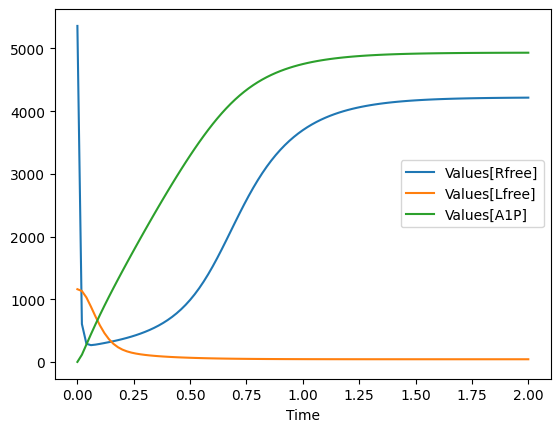

In [23]:
# Check ODE simulation output for maximum length simulation.
%time tc_multisite2_ODE = run_time_course(duration = multisite2_ss_time, method='deterministic')
tc_multisite2_ODE.loc[:, ['Values[Rfree]','Values[Lfree]','Values[A1P]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/multisite2_ode.png')
plt.savefig('../Plots/Trajectories/COPASI/multisite2_ode.pdf')

CPU times: user 209 ms, sys: 0 ns, total: 209 ms
Wall time: 207 ms


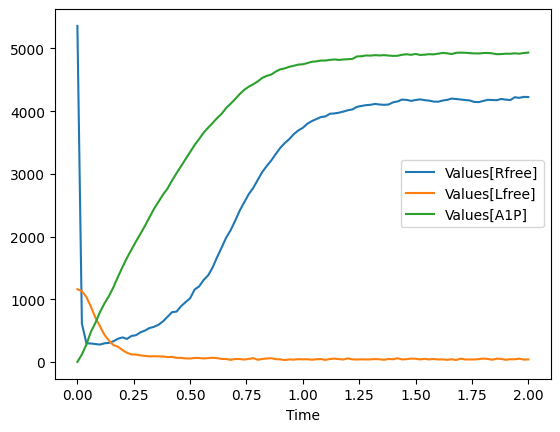

In [24]:
# Check Gillespie simulation output.
%time tc_multisite2_Gillespie = run_time_course(duration = multisite2_ss_time, method='directMethod')
tc_multisite2_Gillespie.loc[:, ['Values[Rfree]','Values[Lfree]','Values[A1P]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/multisite2_ssa.png')
plt.savefig('../Plots/Trajectories/COPASI/multisite2_ssa.pdf')

In [25]:
# Load model (without observables).
load_model('../Data/multisite2_no_obs.xml');

In [26]:
# Check ODE simulation time.
%time run_time_course(duration = multisite2_ss_time, method='deterministic')
%time run_time_course(duration = multisite2_ss_time, method='deterministic', automatic=True)
1;

CPU times: user 22.6 ms, sys: 0 ns, total: 22.6 ms
Wall time: 22.3 ms
CPU times: user 20.9 ms, sys: 0 ns, total: 20.9 ms
Wall time: 20.5 ms


In [27]:
# Check Gillespie simulation time.
%time run_time_course(duration = multisite2_ss_time, method='directMethod')
%time run_time_course(duration = multisite2_ss_time, method='directMethod', automatic=True)
1;

CPU times: user 1.98 s, sys: 64.9 ms, total: 2.04 s
Wall time: 2.03 s
CPU times: user 2.04 s, sys: 42.6 ms, total: 2.08 s
Wall time: 2.08 s


### Egfr_net

In [15]:
# Load model.
egfr_net_ss_time = 10
load_model('../Data/egfr_net.xml');

In [18]:
egfr_net_ss_time = 10000

CPU times: user 480 ms, sys: 613 µs, total: 481 ms
Wall time: 478 ms


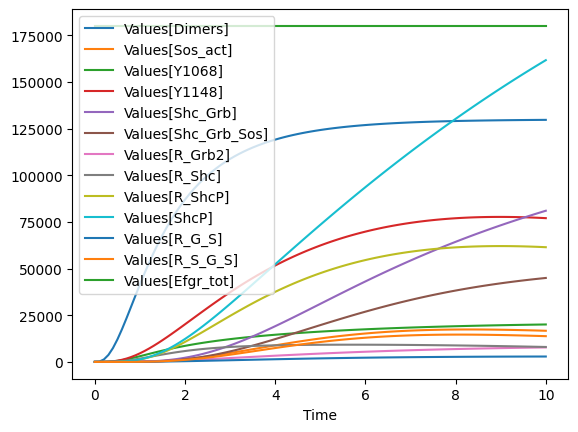

In [29]:
# Check ODE simulation output.
%time tc_egfr_net_ODE = run_time_course(duration = egfr_net_ss_time, method='deterministic')
tc_egfr_net_ODE.loc[:, ['Values[Dimers]','Values[Sos_act]','Values[Y1068]','Values[Y1148]','Values[Shc_Grb]','Values[Shc_Grb_Sos]','Values[R_Grb2]','Values[R_Shc]','Values[R_ShcP]','Values[ShcP]','Values[R_G_S]','Values[R_S_G_S]','Values[Efgr_tot]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/egfr_net_ode.png')
plt.savefig('../Plots/Trajectories/COPASI/egfr_net_ode.pdf')

CPU times: user 32.3 s, sys: 236 ms, total: 32.6 s
Wall time: 32.1 s


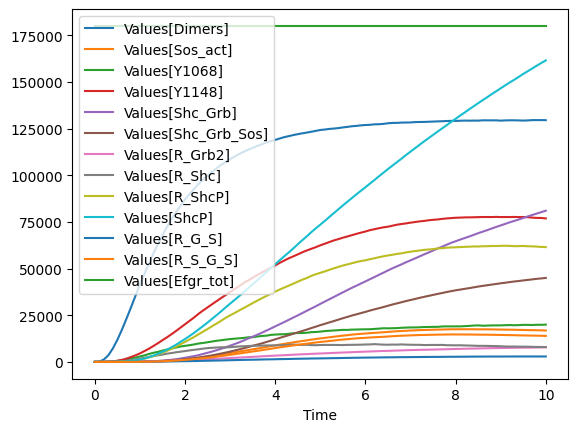

In [30]:
# Check Gillespie simulation output.
%time tc_egfr_net_Gillespie = run_time_course(duration = egfr_net_ss_time, method='directMethod')
tc_egfr_net_Gillespie.loc[:, ['Values[Dimers]','Values[Sos_act]','Values[Y1068]','Values[Y1148]','Values[Shc_Grb]','Values[Shc_Grb_Sos]','Values[R_Grb2]','Values[R_Shc]','Values[R_ShcP]','Values[ShcP]','Values[R_G_S]','Values[R_S_G_S]','Values[Efgr_tot]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/egfr_net_ssa.png')
plt.savefig('../Plots/Trajectories/COPASI/egfr_net_ssa.pdf')

In [31]:
# Load model (without observables).
load_model('../Data/egfr_net_no_obs.xml');

In [32]:
# Check ODE simulation time.
%time run_time_course(duration = egfr_net_ss_time, method='deterministic')
%time run_time_course(duration = egfr_net_ss_time, automatic=True, method='deterministic')
1;

CPU times: user 535 ms, sys: 858 µs, total: 536 ms
Wall time: 530 ms
CPU times: user 610 ms, sys: 1.81 ms, total: 612 ms
Wall time: 608 ms


In [33]:
# Check Gillespie simulation time.
%time run_time_course(duration = egfr_net_ss_time, method='directMethod')
%time run_time_course(duration = egfr_net_ss_time, automatic=True, method='directMethod')
1;

CPU times: user 17min 24s, sys: 5min 39s, total: 23min 4s
Wall time: 22min 49s
CPU times: user 17min 2s, sys: 5min 36s, total: 22min 38s
Wall time: 22min 27s


### BCR

In [18]:
# Load model.
bcr_ss_time = 10
load_model('../Data/BCR.xml');

In [19]:
%time tc_BCR_ODE = run_time_course(duration = 200, method='deterministic')

CPU times: user 22min 22s, sys: 8 s, total: 22min 30s
Wall time: 22min 13s


<AxesSubplot: xlabel='Time'>

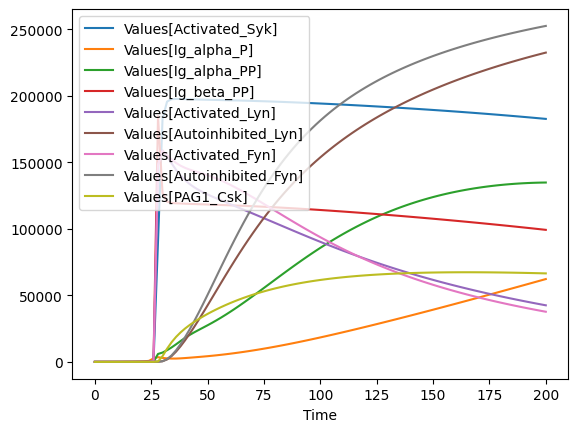

In [20]:
tc_BCR_ODE.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()

<AxesSubplot: xlabel='Time'>

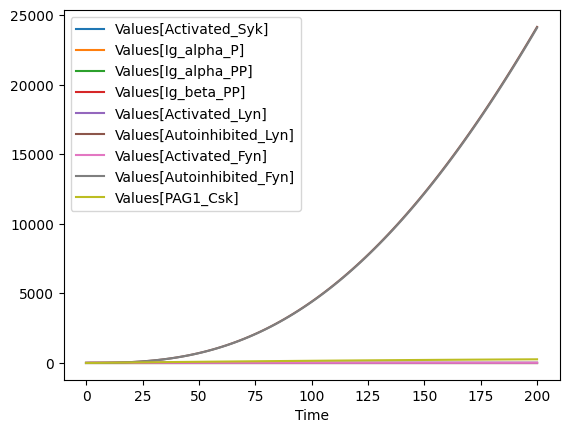

In [13]:
tc_BCR_ODE.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()

In [4]:
# Load model.
bcr_ss_time = 10
load_model('../Data/OUTOUT/BCR.xml');

In [5]:
%time tc_BCR_ODE = run_time_course(duration = 10, method='deterministic')

CPU times: user 7.01 ms, sys: 3.27 ms, total: 10.3 ms
Wall time: 14.5 ms


In [34]:
# Load model.
bcr_ss_time = 10000
load_model('../Data/BCR.xml');

In [4]:
load_model('../Data/BCRSSA_sbml.xml');

In [5]:
%time tc_BCR_ODE = run_time_course(duration = 10000, method='deterministic')

CPU times: user 45min 37s, sys: 17.7 s, total: 45min 54s
Wall time: 45min 7s


<AxesSubplot: xlabel='Time'>

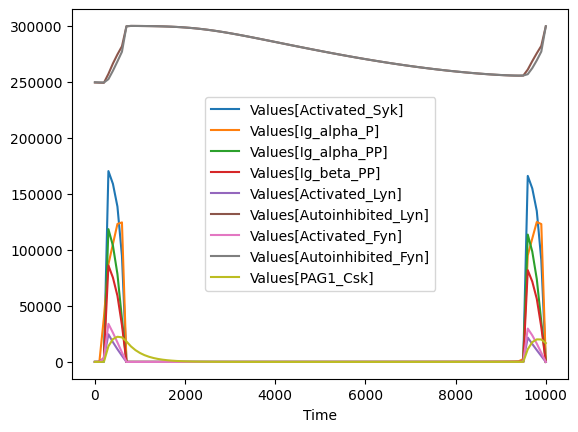

In [6]:
tc_BCR_ODE.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()


In [ ]:
%time tc_BCR_Gillespie = run_time_course(duration = 40, method='directMethod')

<AxesSubplot: xlabel='Time'>

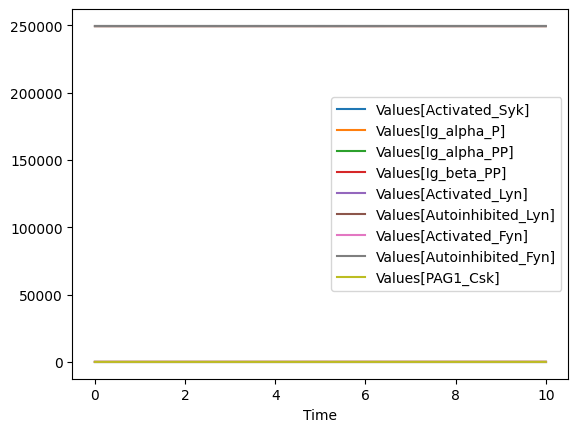

In [19]:
tc_BCR_Gillespie.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()


In [11]:
vars(tc_BCR_Gillespie)

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index([], dtype='object')
 Axis 1: Float64Index([ 0.0,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
               ...
                9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10.0],
              dtype='float64', name='Time', length=101),
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>,
 'plot': <pandas.plotting._core.PlotAccessor object at 0x7f0fdc867970>}

In [8]:
tc_BCR_Gillespie.loc[:, ['Values[Activated_Syk]']].plot()

KeyError: "None of [Index(['Values[Activated_Syk]'], dtype='object')] are in the [columns]"

CPU times: user 4min 8s, sys: 2 s, total: 4min 10s
Wall time: 4min 6s


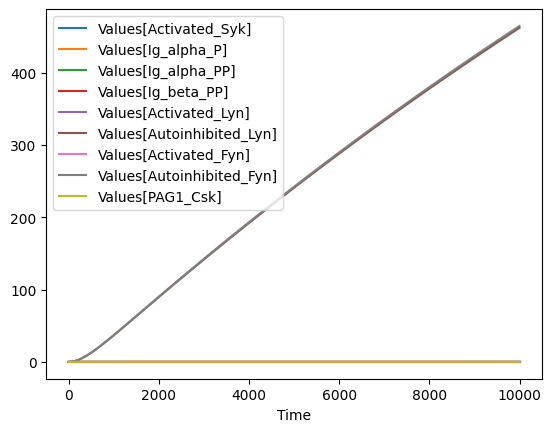

In [35]:
# Check ODE simulation output.
%time tc_BCR_ODE = run_time_course(duration = bcr_ss_time, method='deterministic')
tc_BCR_ODE.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/BCR_ode.png')
plt.savefig('../Plots/Trajectories/COPASI/BCR_ode.pdf')

In [36]:
# Check Gillespie simulation output (not run due to long SSA simulation times for COPASI of the BCR model).
#%time tc_BCR_Gillespie = run_time_course(duration = bcr_ss_time, method='directMethod')
#tc_BCR_Gillespie.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()
#plt.savefig('../Plots/Trajectories/COPASI/BCR_ssa.png')
#plt.savefig('../Plots/Trajectories/COPASI/BCR_ssa.pdf')

In [37]:
# Load model (without observables).
load_model('../Data/BCR_no_obs.xml');

In [38]:
# Check ODE simulation time.
%time run_time_course(duration = bcr_ss_time, method='deterministic')
%time run_time_course(duration = bcr_ss_time, automatic=True, method='deterministic')
1;

CPU times: user 4min 15s, sys: 1.68 s, total: 4min 17s
Wall time: 4min 13s
CPU times: user 4min 17s, sys: 1.38 s, total: 4min 18s
Wall time: 4min 15s


In [39]:
# Check Gillespie simulation time (not run due to long SSA simulation times for COPASI of the BCR model).
# %time run_time_course(duration = 10, method='directMethod')
# %time run_time_course(duration = 10, automatic=True, method='directMethod')
# 1;

### Fceri_gamma2

In [40]:
# Load model.
fceri_gamma2_ss_time = 150
load_model('../Data/fceri_gamma2.xml');

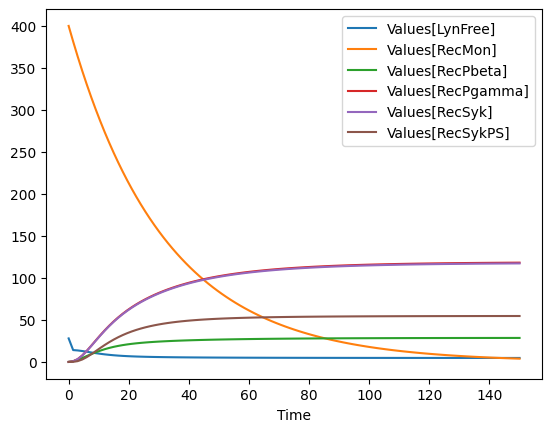

In [49]:
# Check ODE simulation output.
%time tc_fceri_gamma2_ODE = run_time_course(duration = fceri_gamma2_ss_time, method='deterministic')
tc_fceri_gamma2_ODE.loc[:, ['Values[LynFree]','Values[RecMon]','Values[RecPbeta]','Values[RecPgamma]','Values[RecSyk]','Values[RecSykPS]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/fceri_gamma2_ode.png')
plt.savefig('../Plots/Trajectories/COPASI/fceri_gamma2_ode.pdf')

CPU times: user 2h 1min 25s, sys: 22.4 s, total: 2h 1min 48s
Wall time: 2h 1min


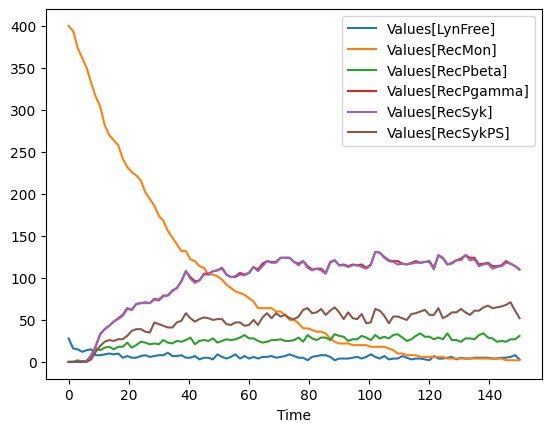

In [50]:
# Check Gillespie simulation output.
%time tc_fceri_gamma2_Gillespie = run_time_course(duration = fceri_gamma2_ss_time, method='directMethod')
tc_fceri_gamma2_Gillespie.loc[:, ['Values[LynFree]','Values[RecMon]','Values[RecPbeta]','Values[RecPgamma]','Values[RecSyk]','Values[RecSykPS]']].plot()
plt.savefig('../Plots/Trajectories/COPASI/fceri_gamma2_ssa.png')
plt.savefig('../Plots/Trajectories/COPASI/fceri_gamma2_ssa.pdf')

In [51]:
# Load model (without observables).
load_model('../Data/fceri_gamma2_no_obs.xml');

: 

: 

In [ ]:
# Check ODE simulation time.
%time run_time_course(duration = fceri_gamma2_ss_time, method='deterministic')
%time run_time_course(duration = fceri_gamma2_ss_time, automatic=True, method='deterministic')
1;

In [ ]:
# Check Gillespie simulation time.
%time run_time_course(duration = fceri_gamma2_ss_time, method='directMethod')
%time run_time_course(duration = fceri_gamma2_ss_time, automatic=True, method='directMethod')
1;